# **GPS Data - Exploratory Data Analysis**

*GPS performance metrics track movement demands, including speed, distance, and acceleration, to assess workload and physical output.
This dataset contains simulated data for 1 player.*

This notebook is organized in the following sections:

* [Part 0 - Preliminary Steps](#0)
    * [Part 0.1 - Importing the Necessary Libraries](#0.1)
    * [Part 0.2 - Reading the GPS Data Dataset](#0.2)

* [Part 1 - Data Cleaning/Wrangling](#1)
    * [Part 1.1 - Preliminary Analysis of the Dataset](#1.1)
    * [Part 1.2 - Dealing with Duplicates](#1.2)
    * [Part 1.3 - Ensuring Correct Data Types](#1.3)
    * [Part 1.4 - Dealing with Null/Missing Values](#1.4)
    * [Part 1.5 - Final Checks](#1.5)

* [Part 2 - Exploratory Data Analysis](#2)
    * [Part 2.1 - Total External Load Analysis](#2.1)
    * [Part 2.2 - High-Intensity Running & Peak Speed](#2.2)
    * [Part 2.3 - Neuromuscular Load (Accelerations/Decelerations)](#2.3)
    * [Part 2.4 - Cardiovascular Stress (HR Zones)](#2.4)
    * [Part 2.5 - Detecting Possible Injury Periods](#2.5)
    * [Part 2.6 - Load Spikes or Acute vs. Chronic Workload Ratios (ACWR)](#2.6)

---

<a id='0'></a>
## Part 0 - Preliminary Steps

<a id='0.1'></a>
### Part 0.1 - Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='0.2'></a>
### Part 0.2 - Reading the GPS Data Dataset

In [2]:
gps_data = pd.read_csv('../data/raw/CFC GPS Data (1).csv', encoding='ISO-8859-1')

---

<a id='1'></a>
## Part 1 - Data Cleaning/Wrangling

<a id='1.1'></a>
### Part 1.1 - Preliminary Analysis of the Dataset

In [3]:
gps_data.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,76.242369,30.75590,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,65.217830,28.67495,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,105.139759,29.21720,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,64.588434,28.70300,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,46.048353,30.29812,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30


In [4]:
gps_data.tail()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
857,07/04/2025,NaN,NaN,1,-5,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
858,08/04/2025,NaN,NaN,2,-4,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
859,09/04/2025,NaN,NaN,3,-3,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
860,10/04/2025,NaN,NaN,4,-2,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
861,11/04/2025,NaN,NaN,5,-1,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


The GPS Data dataset has 862 rows and 20 columns, with only 2 columns which have null values.

In [5]:
gps_data.shape

(862, 20)

In [6]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  862 non-null    object 
 1   opposition_code       147 non-null    object 
 2   opposition_full       147 non-null    object 
 3   md_plus_code          862 non-null    int64  
 4   md_minus_code         862 non-null    int64  
 5   season                862 non-null    object 
 6   distance              862 non-null    float64
 7   distance_over_21      862 non-null    float64
 8   distance_over_24      862 non-null    float64
 9   distance_over_27      862 non-null    float64
 10  accel_decel_over_2_5  862 non-null    float64
 11  accel_decel_over_3_5  862 non-null    float64
 12  accel_decel_over_4_5  862 non-null    float64
 13  day_duration          862 non-null    float64
 14  peak_speed            862 non-null    float64
 15  hr_zone_1_hms         8

<a id='1.2'></a>
### Part 1.2 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [7]:
gps_data.duplicated().any()

False

In [8]:
# Another check for duplicates - just in case
gps_data.duplicated().sum()

0

<a id='1.3'></a>
### Part 1.3 - Ensuring Correct Data Types

Next, we proceeded to ensure whether the data types of all columns were correct/adequate

In [9]:
gps_data.dtypes

date                     object
opposition_code          object
opposition_full          object
md_plus_code              int64
md_minus_code             int64
season                   object
distance                float64
distance_over_21        float64
distance_over_24        float64
distance_over_27        float64
accel_decel_over_2_5    float64
accel_decel_over_3_5    float64
accel_decel_over_4_5    float64
day_duration            float64
peak_speed              float64
hr_zone_1_hms            object
hr_zone_2_hms            object
hr_zone_3_hms            object
hr_zone_4_hms            object
hr_zone_5_hms            object
dtype: object

The columns which had incorrect data types were the following:
* `date` --> should have been in datetime format (%d/%m/%Y)
* `day_duration` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_1_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_2_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_3_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_4_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration
* `hr_zone_5_hms` --> should have been in timedelta format (%H:%M:%S) as it refers to a duration


Therefore, we proceeded to transform each of these columns to the correct format.

In [10]:
# Transforming the columns into the correct data type

## Transforming the date column into datetime format
gps_data['date'] = pd.to_datetime(gps_data['date'], format = '%d/%m/%Y')

## Transforming the day_duration column into timedelta format
gps_data['day_duration'] = pd.to_timedelta(gps_data['day_duration'], unit= 'm')

## Transforming all hr_zone columns into timedelta format
### First we created a list with all the hr_zone columns
hr_columns = []
for col in gps_data.columns:
    if 'hr_zone' and '_hms' in col:
        hr_columns.append(col)

### Then using the hr_zone column list, we used it to transform all hr_zone columns into timedelta format
for col in hr_columns:
    gps_data[f'{col}'] = pd.to_timedelta(gps_data[f'{col}'])

For those columns which represent a duration (i.e., in timedelta format), we converted them later on in our project (in the Feature Engineering section) to numerical columns (i.e., in total seconds), as Machine learning models can’t use `"hh:mm:ss"` directly.

<a id='1.4'></a>
### Part 1.4 - Dealing with Null/Missing Values

Upon inspecting the dataset for null or missing values, we identified two columns containing null entries:

- `opposition_code`
- `opposition_full`

These columns correspond to the code and name of the team Chelsea FC faced on a matchday. A null value in both fields indicates that no match occurred on that particular day. Given that this information did not contribute any additional value to our analysis or modeling efforts, we decided to remove these columns.

To determine whether a given day was a matchday, it is sufficient to refer to the columns `md_plus_code` and `md_minus_code`. A value of 0 in either column signifies a matchday.


In [11]:
gps_data.isna().sum()

date                      0
opposition_code         715
opposition_full         715
md_plus_code              0
md_minus_code             0
season                    0
distance                  0
distance_over_21          0
distance_over_24          0
distance_over_27          0
accel_decel_over_2_5      0
accel_decel_over_3_5      0
accel_decel_over_4_5      0
day_duration              0
peak_speed                0
hr_zone_1_hms             0
hr_zone_2_hms             0
hr_zone_3_hms             0
hr_zone_4_hms             0
hr_zone_5_hms             0
dtype: int64

In [12]:
gps_data.drop(columns=['opposition_code', 'opposition_full'], inplace=True)

In [13]:
gps_data.isna().sum()

date                    0
md_plus_code            0
md_minus_code           0
season                  0
distance                0
distance_over_21        0
distance_over_24        0
distance_over_27        0
accel_decel_over_2_5    0
accel_decel_over_3_5    0
accel_decel_over_4_5    0
day_duration            0
peak_speed              0
hr_zone_1_hms           0
hr_zone_2_hms           0
hr_zone_3_hms           0
hr_zone_4_hms           0
hr_zone_5_hms           0
dtype: int64

Given that the rest of the columns had no null values, we proceeded to carry out some final checks, and later to do some expoloratory data analysis.

<a id='1.5'></a>
### Part 1.5 - Final Checks

In [14]:
gps_data.head()

,date,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,2022-08-02,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,0 days 01:16:14.542158600,30.75590,0 days 00:03:40,0 days 00:17:29,0 days 00:19:20,0 days 00:11:23,0 days 00:00:02
1,2022-08-03,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,0 days 01:05:13.069828800,28.67495,0 days 00:06:44,0 days 00:16:40,0 days 00:15:35,0 days 00:06:08,0 days 00:00:01
2,2022-08-04,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,0 days 01:45:08.385540,29.21720,0 days 00:17:29,0 days 00:37:09,0 days 00:23:49,0 days 00:06:30,0 days 00:00:02
3,2022-08-05,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,0 days 01:04:35.306031,28.70300,0 days 00:07:34,0 days 00:15:51,0 days 00:07:31,0 days 00:01:51,0 days 00:00:00
4,2022-08-06,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,0 days 00:46:02.901182400,30.29812,0 days 00:01:09,0 days 00:01:04,0 days 00:11:34,0 days 00:13:15,0 days 00:02:30


In [15]:
gps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   date                  862 non-null    datetime64[ns] 
 1   md_plus_code          862 non-null    int64          
 2   md_minus_code         862 non-null    int64          
 3   season                862 non-null    object         
 4   distance              862 non-null    float64        
 5   distance_over_21      862 non-null    float64        
 6   distance_over_24      862 non-null    float64        
 7   distance_over_27      862 non-null    float64        
 8   accel_decel_over_2_5  862 non-null    float64        
 9   accel_decel_over_3_5  862 non-null    float64        
 10  accel_decel_over_4_5  862 non-null    float64        
 11  day_duration          862 non-null    timedelta64[ns]
 12  peak_speed            862 non-null    float64        
 13  hr_zo

In [16]:
gps_data.dtypes

date                     datetime64[ns]
md_plus_code                      int64
md_minus_code                     int64
season                           object
distance                        float64
distance_over_21                float64
distance_over_24                float64
distance_over_27                float64
accel_decel_over_2_5            float64
accel_decel_over_3_5            float64
accel_decel_over_4_5            float64
day_duration            timedelta64[ns]
peak_speed                      float64
hr_zone_1_hms           timedelta64[ns]
hr_zone_2_hms           timedelta64[ns]
hr_zone_3_hms           timedelta64[ns]
hr_zone_4_hms           timedelta64[ns]
hr_zone_5_hms           timedelta64[ns]
dtype: object

In [17]:
gps_data.isna().sum()

date                    0
md_plus_code            0
md_minus_code           0
season                  0
distance                0
distance_over_21        0
distance_over_24        0
distance_over_27        0
accel_decel_over_2_5    0
accel_decel_over_3_5    0
accel_decel_over_4_5    0
day_duration            0
peak_speed              0
hr_zone_1_hms           0
hr_zone_2_hms           0
hr_zone_3_hms           0
hr_zone_4_hms           0
hr_zone_5_hms           0
dtype: int64

<a id='1.6'></a>
### Part 1.6 - Saving Cleaned Dataset

Before moving on to performing Exploratory Data Analysis of the GPS data dataset, we wrote to csv the cleaned dataset.

In [19]:
gps_data.to_csv('../data/preprocessed/gps_data_clean.csv')

---

<a id='2'></a>
## Part 2 - Exploratory Data Analysis

Next, we did some exploratory data analysis (EDA) to better understand the player’s workload and recovery patterns over time, and to spot any trends or irregularities in the data.

<a id='2.1'></a>
### Part 2.1. - Total External Load Analysis

#### 🎯 Goal:
To evaluate the **total physical workload** endured by the player across sessions and matches. Key variables include:

- `distance`: Total meters covered in a session (external load).
- `day_duration`: Total session duration in minutes.
- `md_minus_code` and `md_plus_code`: Number of days before or after a match, used to contextualize training load relative to match days.

This section helps detect workload trends, tapering strategies, and post-match recovery practices.


#### Part 2.1.1 - Time Series of Distance and Session Duration

This plot shows the **evolution of total workload over time**, combining both the distance covered and the duration of the session.

- Peaks may indicate match days.
- Sudden drops could indicate rest days or possible injury periods.
- The relationship between `distance` and `day_duration` can reveal if longer sessions equate to higher loads, or if intensity varies.

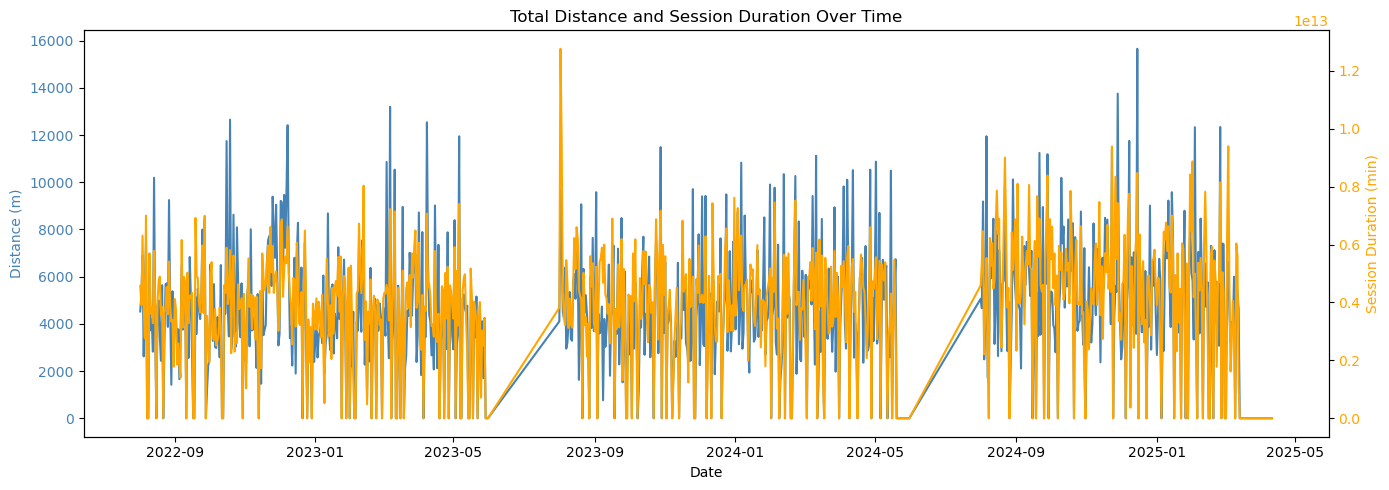

In [20]:
fig, ax1 = plt.subplots(figsize=(14, 5))

# First y-axis for distance
ax1.plot(gps_data['date'], gps_data['distance'], color='steelblue', label='Distance (m)')
ax1.set_ylabel('Distance (m)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Second y-axis for session duration
ax2 = ax1.twinx()
ax2.plot(gps_data['date'], gps_data['day_duration'], color='orange', label='Session Duration (min)')
ax2.set_ylabel('Session Duration (min)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X-axis and title
ax1.set_xlabel('Date')
plt.title('Total Distance and Session Duration Over Time')

# Layout
fig.tight_layout()
plt.show()

#### Part 2.1.2 - Histogram of Distance Distribution

This histogram highlights the **frequency and spread of session distances**. It helps us detect:

- Typical distance ranges.
- Sessions that stand out as outliers (e.g., unusually high or low).
- Whether the training plan follows a consistent workload pattern.


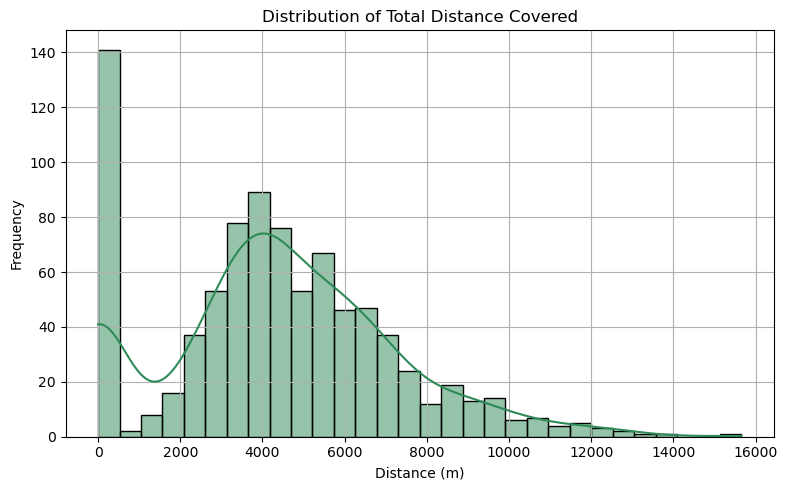

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(gps_data['distance'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Total Distance Covered')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Part 2.1.3 - Boxplots of Distance by Match Context (MD Codes)

These boxplots analyze how distance varies depending on proximity to a match:

- `md_minus_code`: Training days leading up to a match (e.g., MD-1, MD-2).
- `md_plus_code`: Recovery or training days after a match (e.g., MD+1, MD+2).

This helps evaluate if the player's workload is being strategically **periodized** (e.g., tapering before games, recovery after).

C:\Users\trtre\AppData\Local\Temp\ipykernel_14004\48417712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='md_plus_code', y='distance', data=gps_data, palette='Blues')
C:\Users\trtre\AppData\Local\Temp\ipykernel_14004\48417712.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='md_minus_code', y='distance', data=gps_data, palette='Oranges')


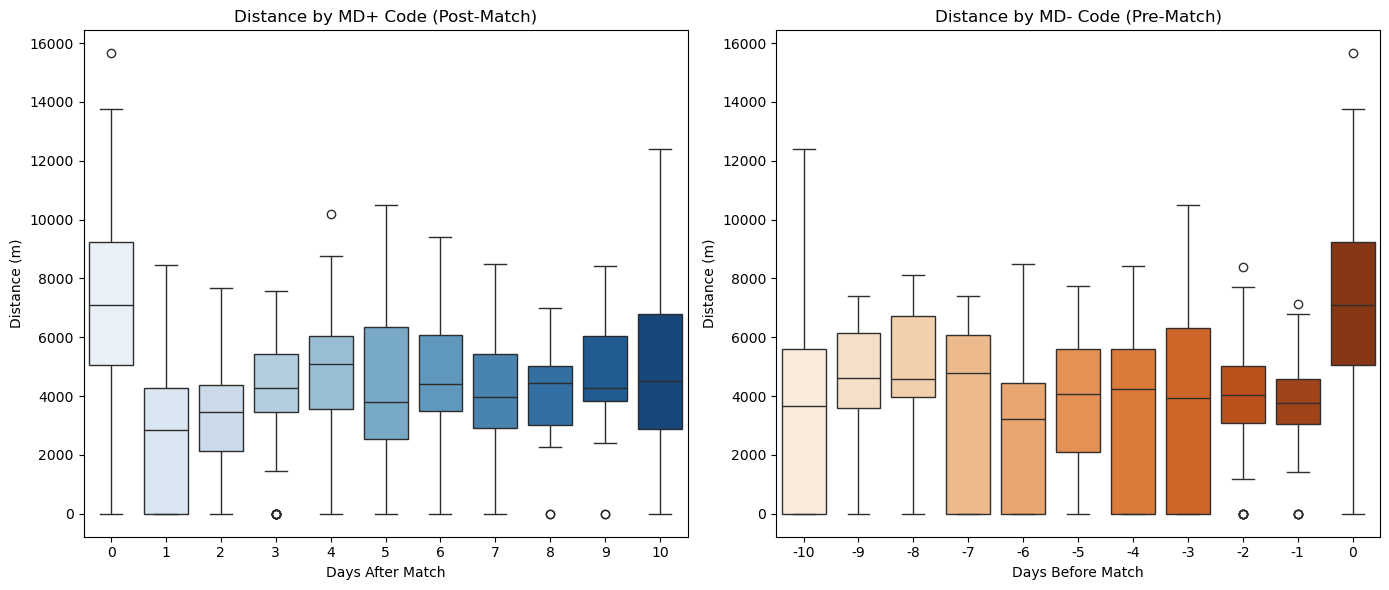

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='md_plus_code', y='distance', data=gps_data, palette='Blues')
plt.title('Distance by MD+ Code (Post-Match)')
plt.xlabel('Days After Match')
plt.ylabel('Distance (m)')

plt.subplot(1, 2, 2)
sns.boxplot(x='md_minus_code', y='distance', data=gps_data, palette='Oranges')
plt.title('Distance by MD- Code (Pre-Match)')
plt.xlabel('Days Before Match')
plt.ylabel('Distance (m)')

plt.tight_layout()
plt.show()

<a id='2.2'></a>
### Part 2.2 - High-Intensity Running & Peak Speed

### 🎯 Goal:
To analyze the **high-intensity demands** placed on the player — which are often linked to fatigue and injury risk. This includes distances covered at different high-speed thresholds and peak sprinting velocities.

Key metrics:
- `distance_over_21`, `distance_over_24`, `distance_over_27`: Distances covered at speeds over 21, 24, and 27 km/h.
- `peak_speed`: The top speed recorded per session.

This section aims to:
- Identify how high-speed running varies over time.
- Spot trends in peak effort.
- Detect periods of excessive loading or potential under-recovery.


#### Part 2.2.1 - Line Chart of High-Speed Running

This plot visualizes how the player’s high-speed running volumes change over time.

- Useful for identifying whether speed thresholds are consistently trained or overloaded.
- Sudden spikes may indicate match-related efforts or overreaching.
- Sustained lows could reflect recovery or injury periods.

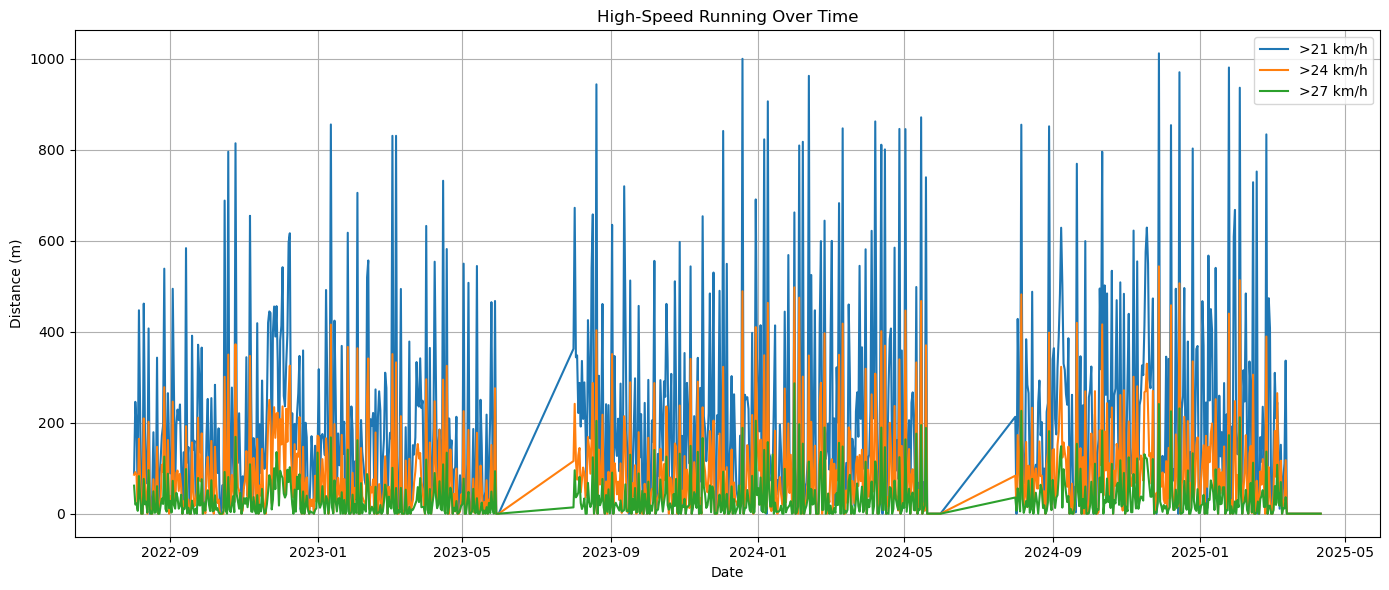

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(gps_data['date'], gps_data['distance_over_21'], label='>21 km/h')
plt.plot(gps_data['date'], gps_data['distance_over_24'], label='>24 km/h')
plt.plot(gps_data['date'], gps_data['distance_over_27'], label='>27 km/h')
plt.title('High-Speed Running Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Part 2.2.2 - Grouped Bar Chart by Week

This bar chart groups weekly totals of high-speed running.

- Aggregating by week helps smooth out session-level noise.
- You can identify periods of cumulative high-speed load.
- Helps assess if training blocks are escalating progressively or jumping erratically.

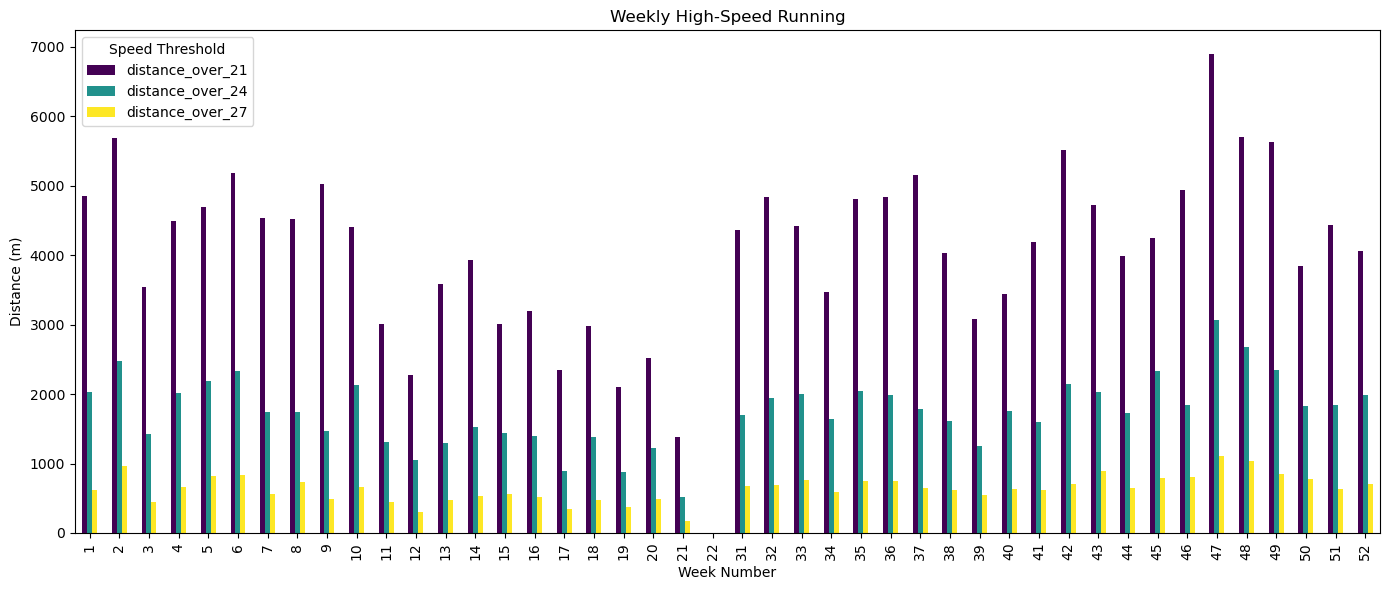

In [24]:
gps_data['week'] = gps_data['date'].dt.isocalendar().week

weekly_high_speed = gps_data.groupby('week')[['distance_over_21', 'distance_over_24', 'distance_over_27']].sum().reset_index()

weekly_high_speed.plot(
    x='week',
    kind='bar',
    stacked=False,
    figsize=(14, 6),
    colormap='viridis'
)
plt.title('Weekly High-Speed Running')
plt.xlabel('Week Number')
plt.ylabel('Distance (m)')
plt.legend(title='Speed Threshold')
plt.tight_layout()
plt.show()

#### Part 2.2.3 - Boxplot of Peak Speed by Match Day Context

This plot compares **peak speed** across different match-related days (`md_minus_code` and `md_plus_code`).

- Helps determine if sprint intensities spike before or after games.
- Supports monitoring of **recovery management** and **tapering strategy**.
- Outliers may point to overexertion or specific tactical training.


C:\Users\trtre\AppData\Local\Temp\ipykernel_14004\1437985575.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='md_code', y='peak_speed', data=gps_data, palette='coolwarm')


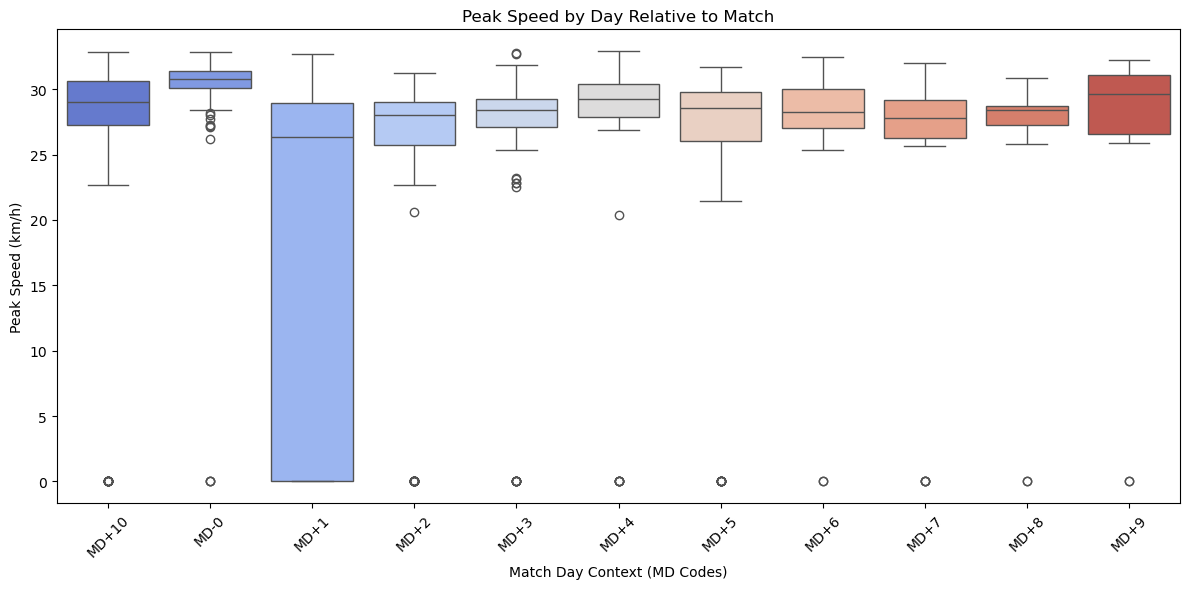

In [25]:
# Create a label that combines MD+ and MD- codes
gps_data['md_code'] = gps_data.apply(
    lambda row: f"MD+{row['md_plus_code']}" if row['md_plus_code'] != 0 else f"MD-{row['md_minus_code']}", axis=1
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='md_code', y='peak_speed', data=gps_data, palette='coolwarm')
plt.title('Peak Speed by Day Relative to Match')
plt.xlabel('Match Day Context (MD Codes)')
plt.ylabel('Peak Speed (km/h)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='2.3'></a>
### Part 2.3 - Neuromuscular Load (Accelerations/Decelerations)



### 🎯 Goal:
To assess the **neuromuscular demands** on the player by examining rapid changes in speed (accelerations and decelerations), which can increase muscular stress and injury risk.

Key metrics:
- `accel_decel_over_2_5`, `accel_decel_over_3_5`, `accel_decel_over_4_5`: Number of acceleration/deceleration efforts exceeding 2.5, 3.5, and 4.5 m/s².

This section helps us:
- Detect periods of neuromuscular fatigue or excessive eccentric loading.
- Identify tactical session types (e.g. small-sided games, high-pressure drills).
- Track if explosive efforts cluster around certain match phases.

#### Part 2.3.1 - Time Series of Accelerations and Decelerations

This time series tracks how often the player exceeds high thresholds of acceleration and deceleration across time.

- Used to monitor **explosiveness** and **stress on tendons/muscles**.
- Sudden rises may indicate intense training blocks or congested schedules.


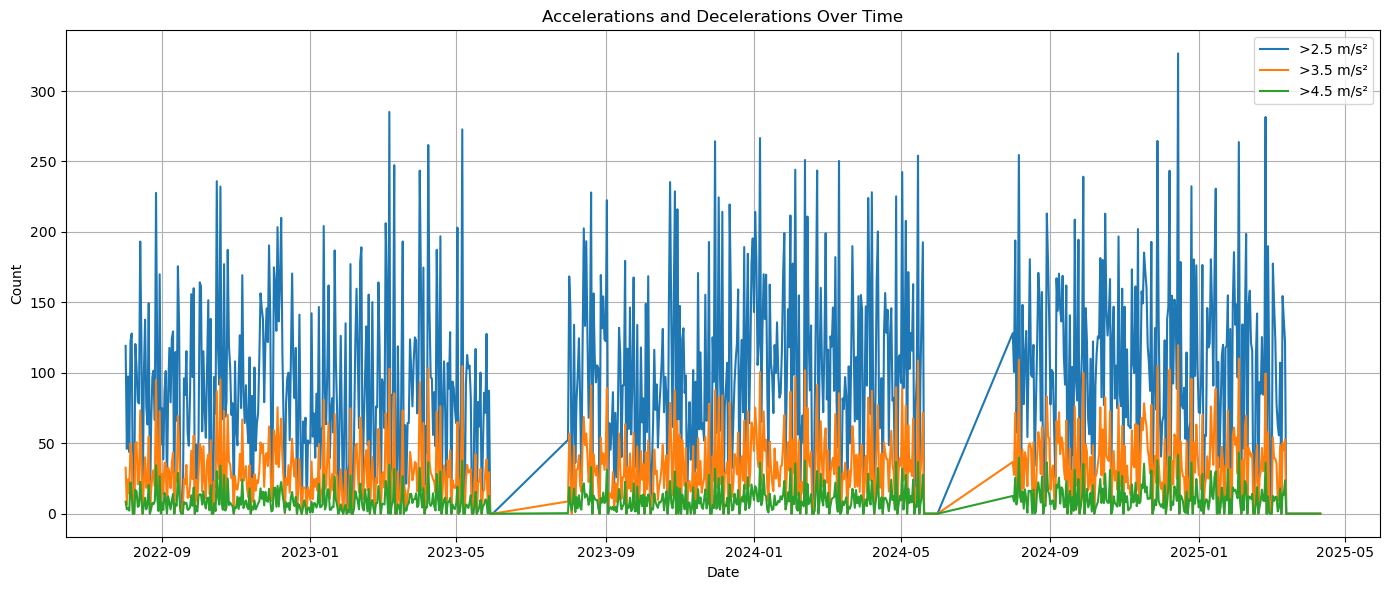

In [26]:
plt.figure(figsize=(14, 6))
plt.plot(gps_data['date'], gps_data['accel_decel_over_2_5'], label='>2.5 m/s²')
plt.plot(gps_data['date'], gps_data['accel_decel_over_3_5'], label='>3.5 m/s²')
plt.plot(gps_data['date'], gps_data['accel_decel_over_4_5'], label='>4.5 m/s²')
plt.title('Accelerations and Decelerations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Part 2.3.2 - Heatmap of Weekly Neuromuscular Load

This heatmap shows the sum of acceleration/deceleration counts per week across all intensity levels.

- It helps visually pinpoint **high neuromuscular load periods**.
- Useful for aligning with match density or recovery strategies.


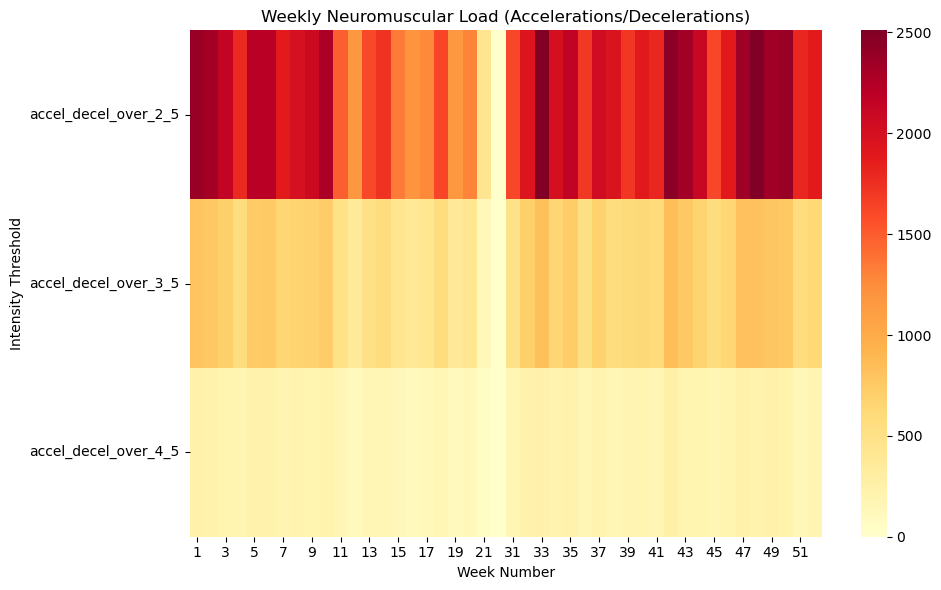

In [27]:
# Group by week and sum neuromuscular load
neuromuscular_weekly = gps_data.groupby(gps_data['date'].dt.isocalendar().week)[
    ['accel_decel_over_2_5', 'accel_decel_over_3_5', 'accel_decel_over_4_5']
].sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    neuromuscular_weekly.T,
    cmap='YlOrRd',
    annot=False  # Removes the cluttered numbers
)
plt.title('Weekly Neuromuscular Load (Accelerations/Decelerations)')
plt.xlabel('Week Number')
plt.ylabel('Intensity Threshold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Part 2.3.3 - Boxplots by Match Day Context

Boxplots for each acceleration/deceleration intensity level by `md_minus_code` and `md_plus_code`.

- Helps understand how neuromuscular load is distributed **before and after matches**.
- Can be used to monitor **planned tapering** or **overload exposure**.


C:\Users\trtre\AppData\Local\Temp\ipykernel_14004\3951098680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='md_minus_code', y='accel_decel_over_3_5', data=gps_data, ax=axes[0], palette='Purples')
C:\Users\trtre\AppData\Local\Temp\ipykernel_14004\3951098680.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='md_plus_code', y='accel_decel_over_3_5', data=gps_data, ax=axes[1], palette='Greens')


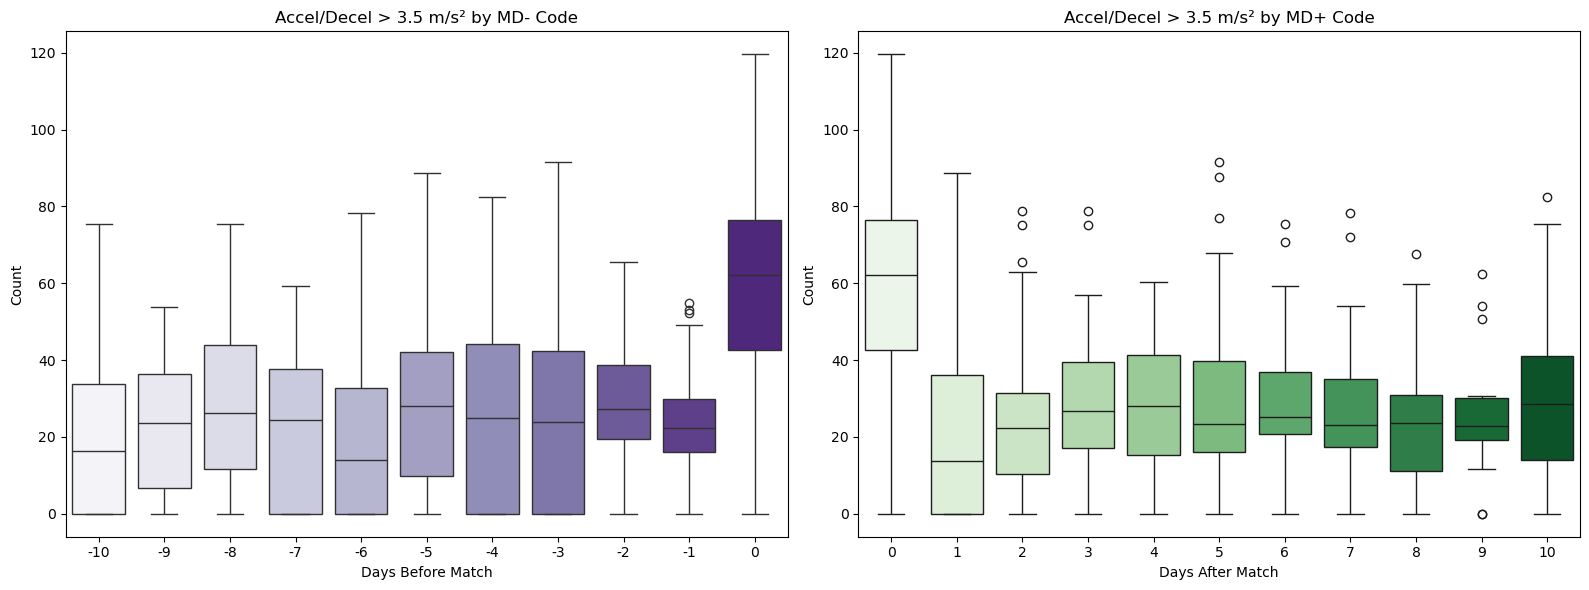

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for days before the match
sns.boxplot(x='md_minus_code', y='accel_decel_over_3_5', data=gps_data, ax=axes[0], palette='Purples')
axes[0].set_title('Accel/Decel > 3.5 m/s² by MD- Code')
axes[0].set_xlabel('Days Before Match')
axes[0].set_ylabel('Count')

# Boxplot for days after the match
sns.boxplot(x='md_plus_code', y='accel_decel_over_3_5', data=gps_data, ax=axes[1], palette='Greens')
axes[1].set_title('Accel/Decel > 3.5 m/s² by MD+ Code')
axes[1].set_xlabel('Days After Match')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<a id='2.4'></a>
### Part 2.4 -  Cardiovascular Stress (HR Zones)

### 🎯 Goal:
To assess the **internal physiological stress** experienced by the player during each session using Heart Rate (HR) zone data.

HR zones:
- `hr_zone_1_hms` to `hr_zone_5_hms`: Time spent in each HR zone, from light to maximum intensity (50–100% of max HR).

This section helps us:
- Understand how much time the athlete spends at **low vs. high cardiovascular intensity**.
- Spot sustained high-zone work that may indicate **strain** or **under-recovery**.
- Pair **external workload** with **internal response**, giving a more complete view.

#### Part 2.4.1 - Distribution of HR Zones per Session

We first converted the HR `timedelta` columns into total minutes. Then we filtered the dataset to only include sessions with **non-zero HR data**, ensuring we didn't plot empty or irrelevant bars.

This allowed us to:
- Compare the intensity distribution across valid sessions.
- Easily identify aerobic (zones 1–2) vs. anaerobic (zones 4–5) training days.

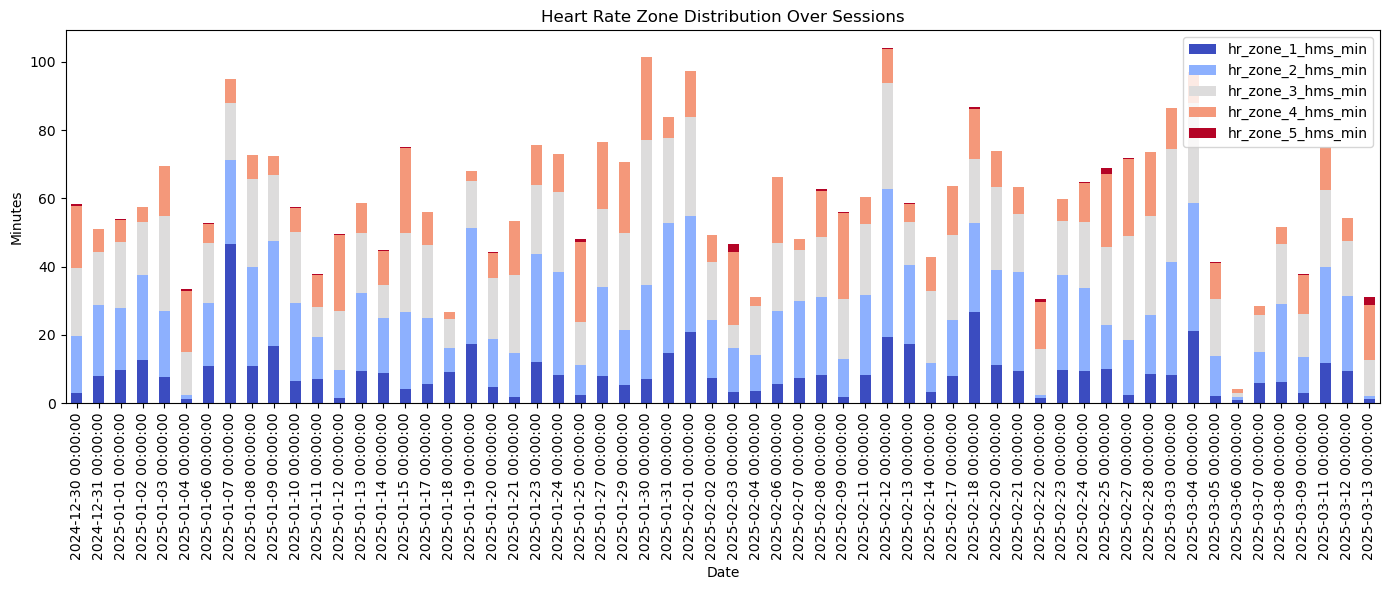

In [30]:
# Step 1: Replace NaT with 0:00:00 to avoid errors when converting
for zone in ['hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms', 'hr_zone_4_hms', 'hr_zone_5_hms']:
    gps_data[zone] = gps_data[zone].fillna(pd.Timedelta(seconds=0))

# Step 2: Convert timedelta to total minutes
for zone in ['hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms', 'hr_zone_4_hms', 'hr_zone_5_hms']:
    gps_data[zone + '_min'] = gps_data[zone].dt.total_seconds() / 60

# Step 3: Prepare plotting data
hr_plot = gps_data[['date'] + [f'hr_zone_{i}_hms_min' for i in range(1, 6)]].copy()
hr_plot.set_index('date', inplace=True)

# Step 4: Filter only sessions with HR activity (non-zero total minutes)
hr_plot_filtered = hr_plot[hr_plot.sum(axis=1) > 0].tail(60)

# Step 5: Plot
hr_plot_filtered.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='coolwarm'
)
plt.title('Heart Rate Zone Distribution Over Sessions')
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Part 2.4.2 - Time Series of High-Intensity HR Zones

This time series tracks time spent in **HR zones 4 and 5**, representing 80–100% of max heart rate.

These zones are associated with:
- **Anaerobic stress**
- High lactate production
- Fatigue accumulation

Tracking their trends over time helps monitor **intensity blocks** and **recovery needs**.



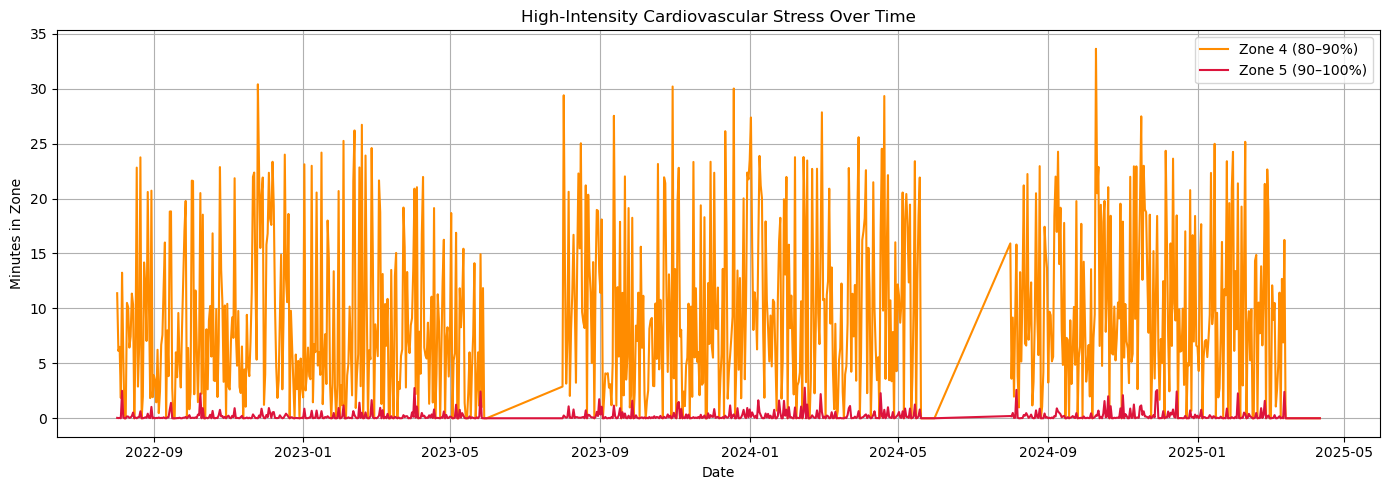

In [31]:
# Convert to minutes if not already done
gps_data['hr_zone_4_min'] = gps_data['hr_zone_4_hms'].fillna(pd.Timedelta(seconds=0)).dt.total_seconds() / 60
gps_data['hr_zone_5_min'] = gps_data['hr_zone_5_hms'].fillna(pd.Timedelta(seconds=0)).dt.total_seconds() / 60

# Plot time series
plt.figure(figsize=(14, 5))
plt.plot(gps_data['date'], gps_data['hr_zone_4_min'], label='Zone 4 (80–90%)', color='darkorange')
plt.plot(gps_data['date'], gps_data['hr_zone_5_min'], label='Zone 5 (90–100%)', color='crimson')
plt.title('High-Intensity Cardiovascular Stress Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes in Zone')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## EXPLORE THIS PART TO BE ABLE TO FIND POTENTIAL INJURY PERIOD!! (2.5.1 ESPECIALLY)

<a id='2.5'></a>
### Part 2.5 - Detecting Possible Injury Periods

### 🎯 Goal:
To identify **potential injury events or rest days** by detecting anomalies in physical output — such as sessions with **zero distance or duration**.

These may indicate:
- A complete rest or off-day.
- Injury-related absence.
- Monitoring gaps or anomalies worth investigating.

This section helps explore:
- Whether a sudden drop in load precedes inactivity.
- Patterns of return-to-play (RTP) after possible injury or overload.

#### Part 2.5.1 - Identify Days with Zero Distance or Duration

Sessions where either `distance = 0` or `day_duration = 0` are flagged as **potential non-activity days**.

- These can be cross-referenced against load spikes or unusual training patterns.
- Important for inferring periods of **injury, illness, or prescribed rest**.

In [38]:
zero_load_days = gps_data[(gps_data['distance'] == 0) | (gps_data['day_duration'] == 0)]

print(f"Number of zero-load days: {len(zero_load_days)}")
zero_load_days[['date', 'distance', 'day_duration']]

Number of zero-load days: 141


,date,distance,day_duration
6,2022-08-08,0.0,0 days
7,2022-08-09,0.0,0 days
14,2022-08-16,0.0,0 days
20,2022-08-22,0.0,0 days
40,2022-09-11,0.0,0 days
...,...,...,...
857,2025-04-07,0.0,0 days
858,2025-04-08,0.0,0 days
859,2025-04-09,0.0,0 days
860,2025-04-10,0.0,0 days


In [36]:
non_match_days = gps_data[(gps_data['md_plus_code'] == 0) & (gps_data['md_minus_code'] == 0)]

print(f"Number of non-match days: {len(non_match_days)}")
non_match_days[['date', 'distance', 'day_duration']]

Number of non-match days: 147


,date,distance,day_duration
4,2022-08-06,5654.028319,0 days 00:46:02.901182400
12,2022-08-14,10190.624200,0 days 01:36:24.252778200
19,2022-08-21,5635.717452,0 days 01:04:02.922104400
25,2022-08-27,9243.838880,0 days 01:30:13.098934800
28,2022-08-30,5380.990631,0 days 00:56:42.625564800
...,...,...,...
828,2025-03-09,5997.883275,0 days 00:48:02.643478800
832,2025-03-13,4621.085135,0 days 00:18:54.441522600
835,2025-03-16,0.000000,0 days 00:00:00
853,2025-04-03,0.000000,0 days 00:00:00


In [40]:
non_match_days[non_match_days['distance']!=0][['date', 'distance', 'day_duration']]

,date,distance,day_duration
4,2022-08-06,5654.028319,0 days 00:46:02.901182400
12,2022-08-14,10190.624200,0 days 01:36:24.252778200
19,2022-08-21,5635.717452,0 days 01:04:02.922104400
25,2022-08-27,9243.838880,0 days 01:30:13.098934800
28,2022-08-30,5380.990631,0 days 00:56:42.625564800
...,...,...,...
813,2025-02-22,5778.224429,0 days 00:29:38.649261600
816,2025-02-25,12338.870350,0 days 02:15:49.487910
825,2025-03-06,3218.229847,0 days 00:26:57.874450200
828,2025-03-09,5997.883275,0 days 00:48:02.643478800


#### Part 2.5.2 - Compare Load Before, During, and After Inactivity

To explore possible overload or RTP cases, we:
- Plot total distance 3 days **before and after** zero-load sessions.
- Helps investigate if **load spikes** preceded rest, or if there's a cautious return pattern.

This type of visualization supports **injury inference** when no explicit injury label is present.


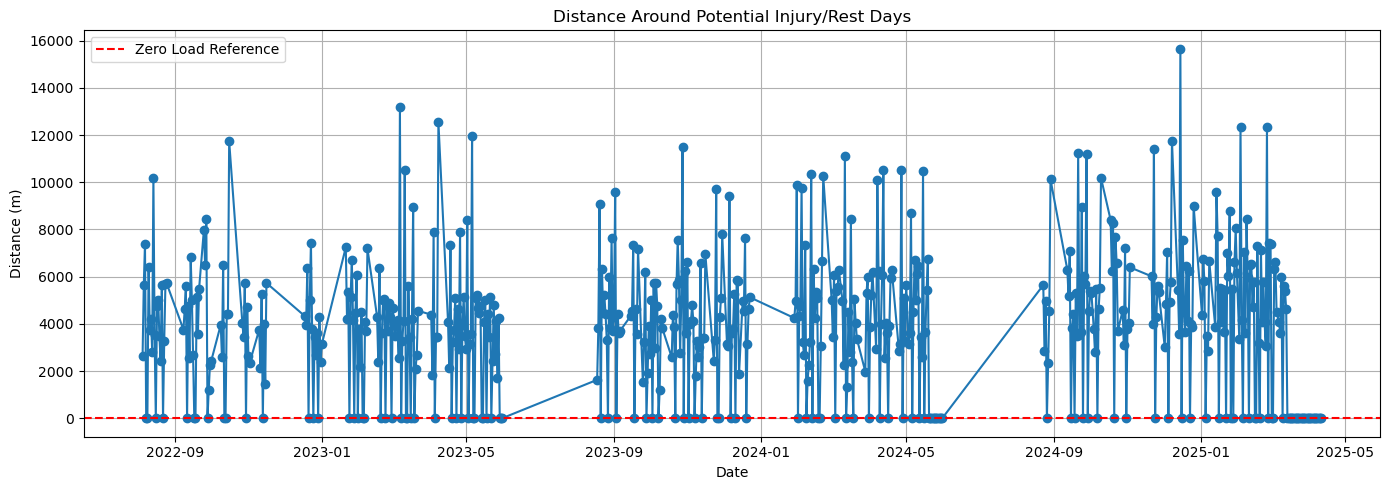

In [41]:
from datetime import timedelta

# Collect days around inactivity for context
surrounding_days = []

for date in zero_load_days['date']:
    window = gps_data[
        (gps_data['date'] >= date - timedelta(days=3)) &
        (gps_data['date'] <= date + timedelta(days=3))
    ]
    surrounding_days.append(window)

# Concatenate context windows and drop duplicates
context_df = pd.concat(surrounding_days).drop_duplicates().sort_values('date')

# Plot
plt.figure(figsize=(14, 5))
plt.plot(context_df['date'], context_df['distance'], marker='o')
plt.axhline(0, color='red', linestyle='--', label='Zero Load Reference')
plt.title('Distance Around Potential Injury/Rest Days')
plt.xlabel('Date')
plt.ylabel('Distance (m)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<a id='2.6'></a>
### Part 2.6 - Load Spikes or Acute vs. Chronic Workload Ratios (ACWR)


### 🎯 Goal:
To calculate the **Acute:Chronic Workload Ratio (ACWR)**, which compares short-term to long-term load to detect dangerous spikes.

- **Acute Load** = rolling average over the last 7 days (1 week).
- **Chronic Load** = rolling average over the last 28 days (4 weeks).
- **ACWR = Acute / Chronic**

Interpretation:
- ACWR ≈ 1.0 → Stable
- ACWR > 1.5 → Sudden load spike (potential risk)
- ACWR < 0.8 → Under-training (possible deconditioning)

This section helps:
- Identify **load imbalance**.
- Detect **risk periods** due to poor load management.
- Visualize how well training is being periodized.

#### Part 2.6.1 - Compute ACWR Based on Distance

We use the `distance` variable as the main workload proxy and compute:

- Acute Load (7-day rolling mean)
- Chronic Load (28-day rolling mean)
- ACWR = Acute / Chronic

In [42]:
# Sort by date just in case
gps_data = gps_data.sort_values('date')

# Rolling averages
gps_data['acute_load'] = gps_data['distance'].rolling(window=7, min_periods=1).mean()
gps_data['chronic_load'] = gps_data['distance'].rolling(window=28, min_periods=1).mean()

# ACWR calculation
gps_data['acwr'] = gps_data['acute_load'] / gps_data['chronic_load']


#### Part 2.6.2 - Plot ACWR Over Time

This time series visualizes the Acute:Chronic Workload Ratio.

- ACWR > 1.5 → Potential overload and injury risk.
- ACWR < 0.8 → Reduced readiness or risk of undertraining.
- Helps optimize **load progression** and **recovery balance**.

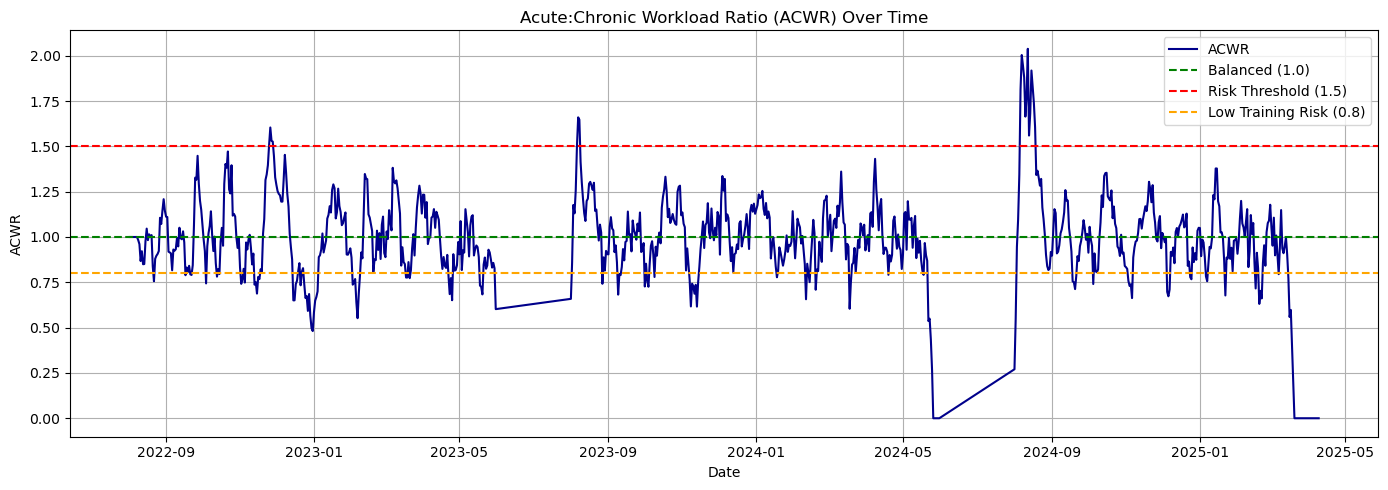

In [43]:
plt.figure(figsize=(14, 5))
plt.plot(gps_data['date'], gps_data['acwr'], color='darkblue', label='ACWR')
plt.axhline(1.0, color='green', linestyle='--', label='Balanced (1.0)')
plt.axhline(1.5, color='red', linestyle='--', label='Risk Threshold (1.5)')
plt.axhline(0.8, color='orange', linestyle='--', label='Low Training Risk (0.8)')
plt.title('Acute:Chronic Workload Ratio (ACWR) Over Time')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## GO OVER AUGUST/SEPTEMBER 2024 PERIOD (ABOVE)

# GO OVER FINAL DISCUSSIONS AND INSIGHTS FROM BELOW --> PERHAPS INTEGRATE INTO EDA 

## 🧠 Final Discussion & Insights

After conducting a comprehensive exploratory data analysis of the player's GPS performance data, several key patterns and potential risk indicators were uncovered:

---

### 🔹 1. Total External Load
- The player's **total distance and session duration** showed expected fluctuations aligned with match cycles.
- Boxplots revealed **clear tapering before matches** (MD-1, MD-2) and **reduced volume post-match** (MD+1), suggesting structured load management.

---

### 🔹 2. High-Intensity Running & Peak Speed
- High-speed running volumes (>21, >24, >27 km/h) fluctuated regularly, likely reflecting tactical periodization.
- Weekly bar charts and peak speed boxplots suggested **higher intensity near match days**, with occasional spikes post-match — a point worth monitoring for overload risk.

---

### 🔹 3. Neuromuscular Load
- Accelerations and decelerations above 2.5/3.5/4.5 m/s² varied weekly.
- Heatmaps showed **clusters of high neuromuscular demand**, potentially linked to small-sided games or pressing drills.
- Match-day context plots indicated **reduced explosive effort pre-match**, aligning with recovery principles.

---


---

### 🔹 4. Cardiovascular Stress
- Time spent in HR zones 4–5 highlighted **intense physiological strain** on certain days.
- These days often matched external load spikes, reinforcing the idea of **combined internal and external stress** that could require more recovery time.

---

### 🔹 5. Detecting Injury/Rest Periods
- Sessions with **zero distance or duration** were detected and analyzed.
- Many were preceded by high-load days, suggesting potential **overreaching or scheduled rest**.
- Contextual plots showed gradual re-entry into full load after some of these zero-load periods.

---

### 🔹 6. Acute:Chronic Workload Ratio (ACWR)
- ACWR values hovered around 1.0 for most weeks, indicating stable training.
- A few spikes above 1.5 may represent **elevated injury risk**, especially if they coincided with other load peaks or minimal recovery.

---


---

### 🧩 Final Reflections

This EDA serves as a foundational step toward building **injury risk models** and improving **player monitoring strategies**. By combining load, intensity, neuromuscular, and cardiovascular data, we gain a holistic view of the player’s physical demands.

Future steps could include:
- Integrating **recovery and physical capability datasets**.
- Using **machine learning** to classify potential injury risk periods.
- Adding **injury label annotations**, if available, to validate observed workload patterns.

Overall, the player appears to be managed with intention, but **a few red flags (ACWR spikes, short high-load sessions)** suggest areas for continued monitoring.
